In [2]:
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from RegscorePy import *
from collections import OrderedDict

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [2]:
def combine_deep_smf(low_r,ssfq, affix,z):
    smf1,count1 = np.load(path+'smf_'+low_r+'_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2,count2 = np.load(path+'smf_'+low_r+'_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3,count3 = np.load(path+'smf_'+low_r+'_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4,count4 = np.load(path+'smf_'+low_r+'_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf5,count5 = np.load(path+'smf_'+low_r+'_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return (smf1+smf2+smf3+smf4+smf5)/(count1+count2+count3+count4+count5)

### schecter function fitting

In [5]:
# schecter function
def schechter(m,phi,m_s,alpha_s):
    m=10**(m-7)
    return phi*(m/m_s)**(alpha_s+1)*np.exp(-((m/m_s)**2))

# fitting schecter function
def fit_schechter(xdata, ydata, ydata_err, start,end):
    popt,pcov = curve_fit(schechter, xdata[start-1:end], ydata[start-1:end], sigma=ydata_err[start-1:end],p0=[1.645e+03,3.918e+03,-1.048])
    
    res = ydata - schechter(xdata, *popt)
    chi2 = sum((res / ydata_err) ** 2)
    return popt,pcov,chi2

### Stellar Mass Function of Satellites

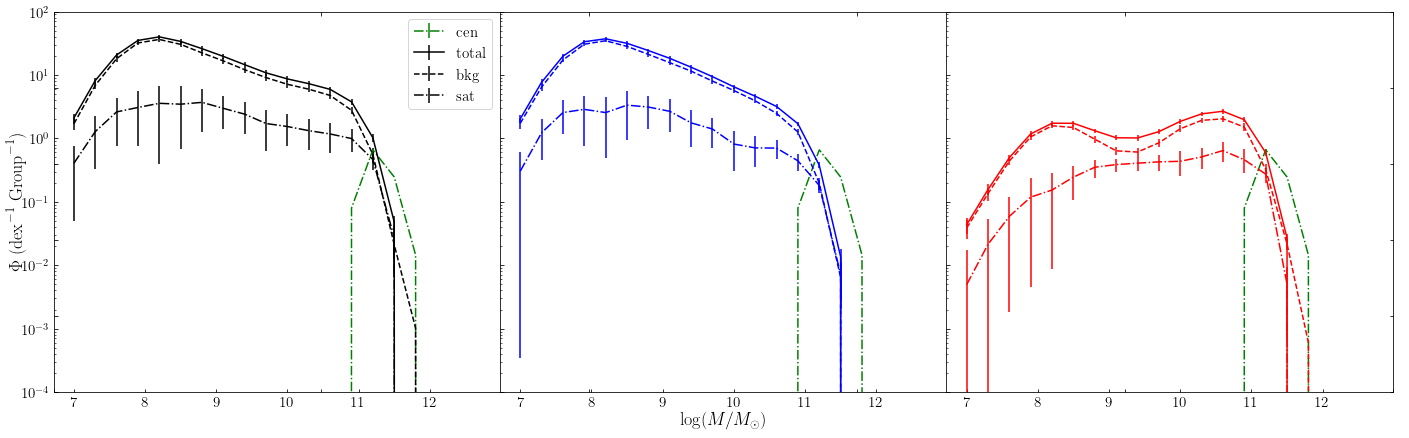

In [9]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(24,7))
path = 'CUT_deep_catalogs/test_smf_results/test_smf_new_cat/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]
z=0.4
low_r='0.0'; high_r='0.7'

#load data
all_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_total.npy')
all_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_bkg.npy')
all_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_sat.npy')
all_cen = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_cen.npy')
sf_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_total.npy')
sf_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_bkg.npy')
sf_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_sat.npy')
q_total = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_total.npy')
q_bkg = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_bkg.npy')
q_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_sat.npy')

axs[0].errorbar(bin_edges, all_cen[0]/all_cen[-1],yerr=0,fmt='-.g',label='cen')
axs[1].errorbar(bin_edges, all_cen[0]/all_cen[-1],yerr=0,fmt='-.g',label='cen')
axs[2].errorbar(bin_edges, all_cen[0]/all_cen[-1],yerr=0,fmt='-.g',label='cen')

# all
error = [(all_total[0]-all_total[1])/all_total[-1], (all_total[2]-all_total[0])/all_total[-1]]
axs[0].errorbar(bin_edges, all_total[0]/all_total[-1],yerr=error,fmt='k',label='total')
axs[0].errorbar(bin_edges, all_bkg[0]/all_bkg[-1],yerr=error,fmt='--k',label='bkg')
axs[0].errorbar(bin_edges, all_sat[0]/all_sat[-1],yerr=error,fmt='-.k',label='sat')

#sf
error_sf = [(sf_total[0]-sf_total[1])/sf_total[-1], (sf_total[2]-sf_total[0])/sf_total[-1]]
axs[1].errorbar(bin_edges, sf_total[0]/sf_total[-1],yerr=error_sf,fmt='b')
axs[1].errorbar(bin_edges, sf_bkg[0]/sf_bkg[-1],yerr=error_sf,fmt='--b')
axs[1].errorbar(bin_edges, sf_sat[0]/sf_sat[-1],yerr=error_sf,fmt='-.b')

#q
error_q = [(q_total[0]-q_total[1])/q_total[-1], (q_total[2]-q_total[0])/q_total[-1]]
axs[2].errorbar(bin_edges, q_total[0]/q_total[-1],yerr=error_q,fmt='r')
axs[2].errorbar(bin_edges, q_bkg[0]/q_bkg[-1],yerr=error_q,fmt='--r')
axs[2].errorbar(bin_edges, q_sat[0]/q_sat[-1],yerr=error_q,fmt='-.r')

axs[0].set_yscale('log')
axs[0].set_ylim([1e-4,1e2])
axs[0].legend(fontsize=15)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel(r'$\log(M/M_\odot)$', fontsize=18)
plt.ylabel(r'$\Phi~ (\mathrm{dex}^{-1} ~\mathrm{Group}^{-1})$', fontsize=18)
plt.savefig('figures/smf_total_bkg_sat_'+str(z)+'.png')
plt.show()

[ 9.290e-01  1.784e+04 -1.209e+00]


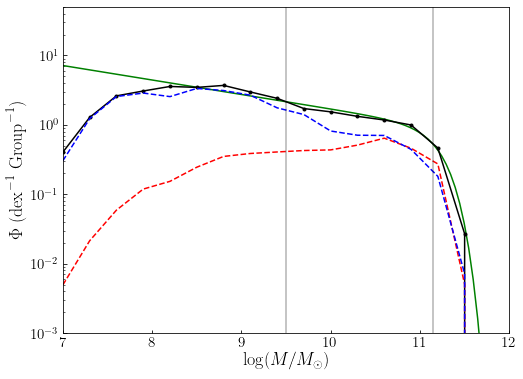

In [8]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))
fit_m = np.linspace(7,12,num=100)
path = 'CUT_deep_catalogs/test_smf_results/test_smf_new_cat/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

z=0.4
low_r='0.0'
high_r='0.7'

all_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_all_'+str(z)+'_sat.npy')
sf_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_ssf_'+str(z)+'_sat.npy')
q_sat = np.load(path+'smf_'+low_r+'_'+high_r+'_7.0_all_sq_'+str(z)+'_sat.npy')

popt,pcov,chi2=fit_schechter(bin_edges,all_sat[0]/all_sat[-1],np.sqrt(abs(all_sat[0]+0.0001)),start=5,end=-3)
plt.plot(fit_m,schechter(fit_m,popt[0],popt[1],popt[2]),'g')
print(popt)

plt.plot(bin_edges, all_sat[0]/all_sat[-1],'.-k',label='total')
plt.plot(bin_edges, q_sat[0]/all_sat[-1],'--r',label='q')
plt.plot(bin_edges, sf_sat[0]/all_sat[-1],'--b',label='sf')

plt.plot([11.15,11.15],[1e-5,1e2],'k',alpha=0.3)
plt.plot([9.5,9.5],[1e-5,1e2],'k',alpha=0.3)
plt.ylim([1e-3,5e1])
plt.xlim([7,12])
plt.yscale('log')

plt.xlabel(r'$\log(M/M_\odot)$', fontsize=18)
plt.ylabel(r'$\Phi~ (\mathrm{dex}^{-1} ~\mathrm{Group}^{-1})$', fontsize=18)
plt.savefig('figures/smf_sat_'+str(z)+'.png')

In [3]:
path = 'CUT_deep_catalogs/test_smf_results/test_smf_new_cat/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

In [4]:
bin_edges

array([ 7. ,  7.3,  7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ,
       10.3, 10.6, 10.9, 11.2, 11.5, 11.8, 12.1, 12.4, 12.7])